# Videogames & Metacritic Score EDA 🎮👾

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
games = pd.read_csv('all_video_games(cleaned).csv')

In [3]:
games.sample(5)

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info
13808,The Long Journey Home,5/30/2017,Daedalic Studio West,Daedalic Entertainment,Action Adventure,NaN,7.2,31.0,"[{'Platform': 'PC', 'Platform Metascore': '68'..."
11496,Gleamlight,8/20/2020,DICO,D3Publisher,2D Platformer,NaN,2.8,10.0,"[{'Platform': 'Nintendo Switch', 'Platform Met..."
10424,Magnetic Billiards: Blueprint,7/16/2011,Zee 3 Limited,Zee 3 Limited,Puzzle,NaN,NaN,NaN,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
13973,Tribes: Ascend,4/12/2012,Hi-Rez Studios,Hi-Rez Studios,FPS,Rated T For Teen,7.8,596.0,"[{'Platform': 'PC', 'Platform Metascore': '86'..."
11655,Tin Man Can,1/17/2013,Chillingo,Chillingo,Adventure,NaN,NaN,NaN,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Product Rating      11005 non-null  object 
 6   User Score          11714 non-null  float64
 7   User Ratings Count  11299 non-null  float64
 8   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(7)
memory usage: 988.4+ KB


In [5]:
games.describe()

,User Score,User Ratings Count
count,11714.000000,11299.000000
mean,6.894852,245.642977
std,1.392213,1847.895353
min,0.300000,5.000000
25%,6.200000,14.000000
50%,7.200000,34.000000
75%,7.900000,111.000000
max,10.000000,163419.000000


Vemos un claro problema coa desviación da columna de User Ratings Count

Creamos a columna Release Year

In [6]:
games['Release Date']=pd.to_datetime(games['Release Date'])

In [7]:
games['ReleaseYear'] = games['Release Date'].dt.year
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               14034 non-null  object        
 1   Release Date        13991 non-null  datetime64[ns]
 2   Developer           13917 non-null  object        
 3   Publisher           13917 non-null  object        
 4   Genres              14034 non-null  object        
 5   Product Rating      11005 non-null  object        
 6   User Score          11714 non-null  float64       
 7   User Ratings Count  11299 non-null  float64       
 8   Platforms Info      14055 non-null  object        
 9   ReleaseYear         13991 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.1+ MB


In [8]:
games.sample(5)

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,ReleaseYear
2241,Under Night In-Birth Exe:Late[st],2018-02-09,French-Bread,Aksys Games,2D Fighting,Rated T For Teen,8.1,41.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2018.0
11007,Arma 3,2013-09-12,Bohemia Interactive,Bohemia Interactive,Simulation,Rated M For Mature,7.6,1134.0,"[{'Platform': 'PC', 'Platform Metascore': '74'...",2013.0
4059,Front Mission 4,2004-06-15,Square Enix,Square Enix,Turn-Based Tactics,Rated T For Teen,8.5,31.0,"[{'Platform': 'PlayStation 2', 'Platform Metas...",2004.0
9983,Art Style: light trax,2010-05-24,Skip Ltd.,Nintendo,Miscellaneous,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Wii', 'Platform Metascore': '76...",2010.0
403,MLB The Show 16,2016-03-29,SCEA San Diego Studios,SCEA,Baseball Sim,Rated E For Everyone,7.3,190.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2016.0


Mostramos xogos lanzados por ano.

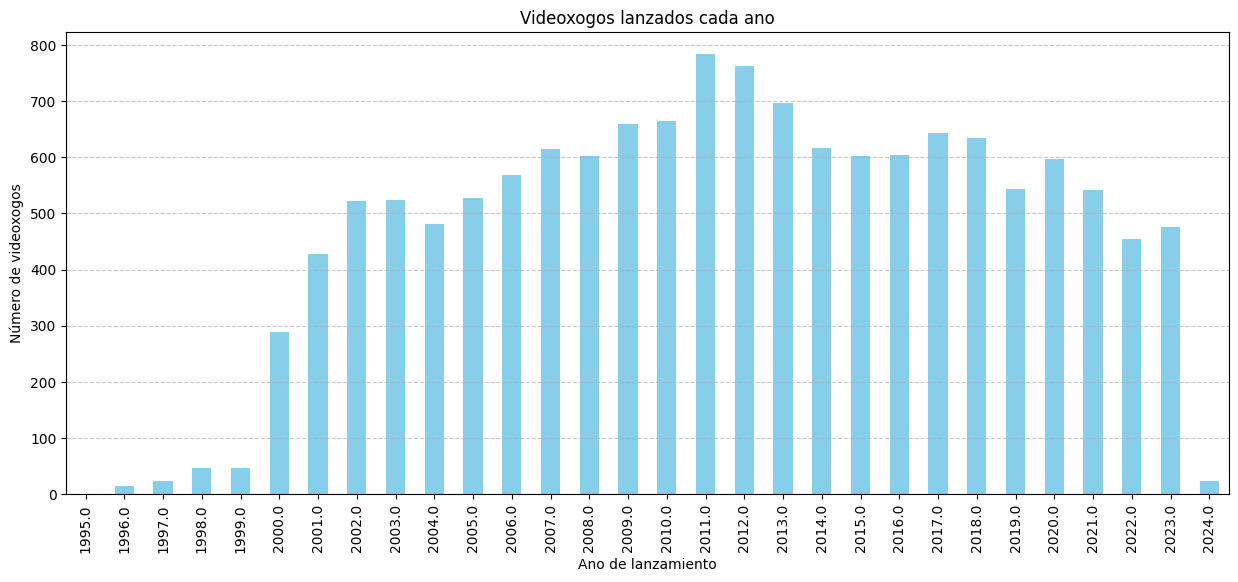

In [9]:
games_per_year = games.groupby('ReleaseYear').size()

plt.figure(figsize=(15, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Videoxogos lanzados cada ano')
plt.xlabel('Ano de lanzamiento')
plt.ylabel('Número de videoxogos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Vese unha clara diferencia no número de videoxogos antes de ano 2000 e no ano 2024 (xa que son ten datos de ate principios de febreiro).

Imos buscar nulls e duplicados antes de facer máis cambios no dataset.

In [10]:
missing_val_count_by_column = (games.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Title                   21
Release Date            64
Developer              138
Publisher              138
Genres                  21
Product Rating        3050
User Score            2341
User Ratings Count    2756
ReleaseYear             64
dtype: int64


Decido borrar os null debido a parte da natureza das columnas categóricas e borrar os nulls que quedan nas numéricas para non engadir información externa, xa que as filas que quedan (mais de 9k) parecen correctas.

In [11]:
games_clean = games.dropna()

In [12]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9085 entries, 3 to 14053
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               9085 non-null   object        
 1   Release Date        9085 non-null   datetime64[ns]
 2   Developer           9085 non-null   object        
 3   Publisher           9085 non-null   object        
 4   Genres              9085 non-null   object        
 5   Product Rating      9085 non-null   object        
 6   User Score          9085 non-null   float64       
 7   User Ratings Count  9085 non-null   float64       
 8   Platforms Info      9085 non-null   object        
 9   ReleaseYear         9085 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 780.7+ KB


Non hai filas duplicadas.

In [13]:
games_clean[games_clean.duplicated()]

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,ReleaseYear


Imos mostrar tamén o número de ratings por ano, antes de facer máis cambios.

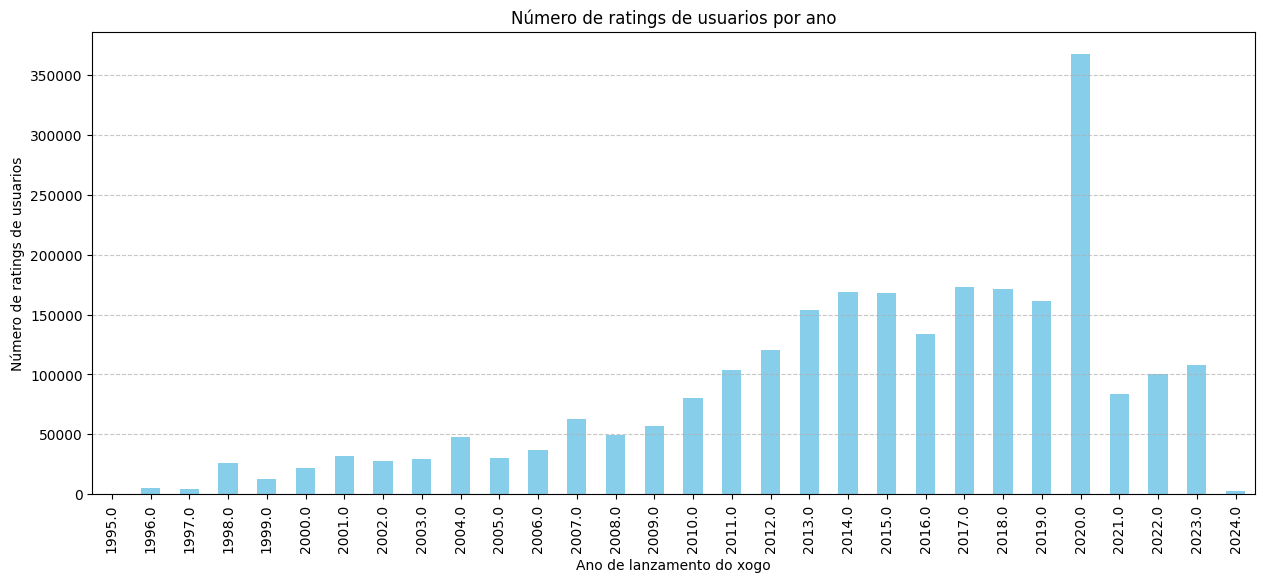

In [14]:
ratings_per_year = games_clean.groupby('ReleaseYear')['User Ratings Count'].sum()

plt.figure(figsize=(15, 6))
ratings_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de ratings de usuarios por ano')
plt.xlabel('Ano de lanzamento do xogo')
plt.ylabel('Número de ratings de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

De novo vemos poucos datos nos primeiros anos e en 2024. Ademais vemos claramente a diferencia no ano 2020, a qué se deberá?

In [15]:
games_clean.sort_values(by='User Ratings Count', ascending=False).head(10)

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,ReleaseYear
10941,The Last of Us Part II,2020-06-19,Naughty Dog,Sony Interactive Entertainment,Survival,Rated M For Mature,5.8,163419.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2020.0
13678,Cyberpunk 2077,2020-12-10,CD Projekt Red Studio,CD Projekt Red Studio,Action RPG,Rated M For Mature,7.1,35194.0,"[{'Platform': 'PC', 'Platform Metascore': '86'...",2020.0
3109,Warcraft III: Reforged,2020-01-28,Blizzard Entertainment,Blizzard Entertainment,Real-Time Strategy,Rated T For Teen,0.6,31141.0,"[{'Platform': 'PC', 'Platform Metascore': '59'...",2020.0
7377,God of War,2018-04-20,SCE Santa Monica,Sony Interactive Entertainment,Linear Action Adventure,Rated M For Mature,9.1,24855.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2018.0
7591,Red Dead Redemption 2,2018-10-26,Rockstar Games,Rockstar Games,Open-World Action,Rated M For Mature,8.8,23875.0,"[{'Platform': 'Xbox One', 'Platform Metascore'...",2018.0
6075,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,Nintendo,Open-World Action,Rated E +10 For Everyone +10,8.8,22216.0,"[{'Platform': 'Wii U', 'Platform Metascore': '...",2017.0
13391,Ghost of Tsushima,2020-07-17,Sucker Punch,Sony Interactive Entertainment,Open-World Action,Rated M For Mature,9.1,21863.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2020.0
2930,The Last of Us Remastered,2014-07-29,Naughty Dog,SCEA,Linear Action Adventure,Rated M For Mature,9.2,20141.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2014.0
7612,The Witcher 3: Wild Hunt,2015-05-19,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,Rated M For Mature,9.2,19581.0,"[{'Platform': 'PC', 'Platform Metascore': '93'...",2015.0
3212,Death Stranding,2019-11-08,Kojima Productions,Sony Interactive Entertainment,Open-World Action,Rated M For Mature,7.4,18746.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2019.0


Vemos que os tres xogos con máis ratings son de 2020 e hai unha diferencia moi sustancial entre o primeiro e segundo.

Imos eliminar os xogos de 2024 para non ter ese descenso tan brusco nas seguintes representacións. Imos deixar os primeiros anos, xa que pode ser que realmente houbese menos xogos rexistrados.

In [16]:
games_clean= games_clean[games_clean['ReleaseYear'] != 2024]

Imos tratar tamén os outliers, pero creamos un novo dataset para poder representar un ou outro en caso de que nos interese representar o que ten outliers.

In [17]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [18]:

games_clean2 = games_clean.copy()

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


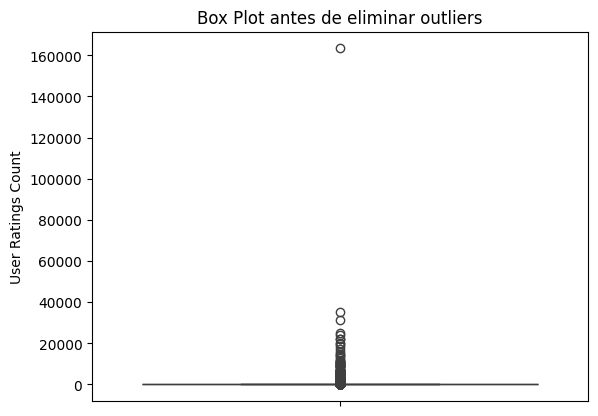

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


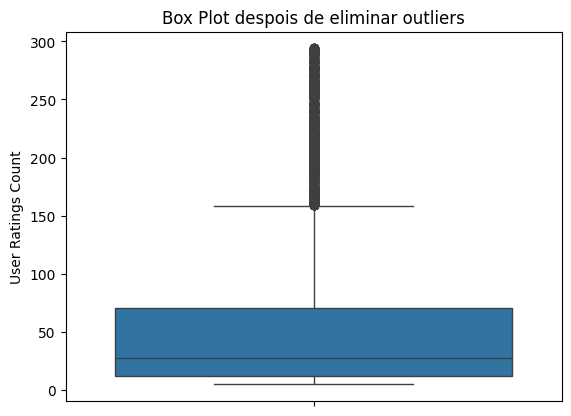

In [19]:
sns.boxplot(games_clean['User Ratings Count'])
plt.title("Box Plot antes de eliminar outliers")
plt.show()


drop_outliers(games_clean2, 'User Ratings Count')
sns.boxplot(games_clean2['User Ratings Count'])
plt.title("Box Plot despois de eliminar outliers")
plt.show()

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


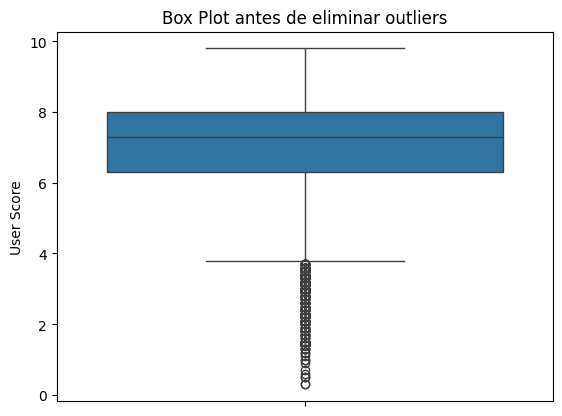

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


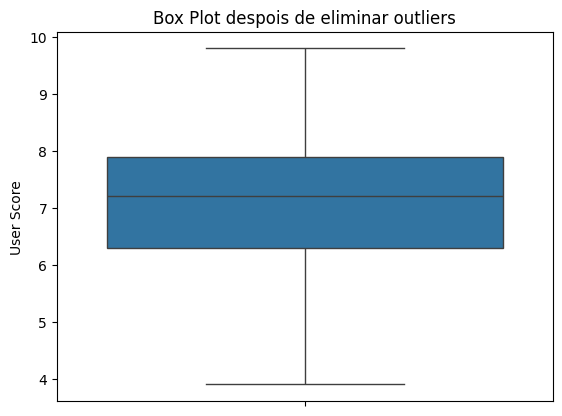

In [20]:
sns.boxplot(games_clean['User Score'])
plt.title("Box Plot antes de eliminar outliers")
plt.show()

drop_outliers(games_clean2, 'User Score')
sns.boxplot(games_clean2['User Score'])
plt.title("Box Plot despois de eliminar outliers")
plt.show()

In [21]:
games_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7497 entries, 5 to 14052
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               7497 non-null   object        
 1   Release Date        7497 non-null   datetime64[ns]
 2   Developer           7497 non-null   object        
 3   Publisher           7497 non-null   object        
 4   Genres              7497 non-null   object        
 5   Product Rating      7497 non-null   object        
 6   User Score          7497 non-null   float64       
 7   User Ratings Count  7497 non-null   float64       
 8   Platforms Info      7497 non-null   object        
 9   ReleaseYear         7497 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 644.3+ KB


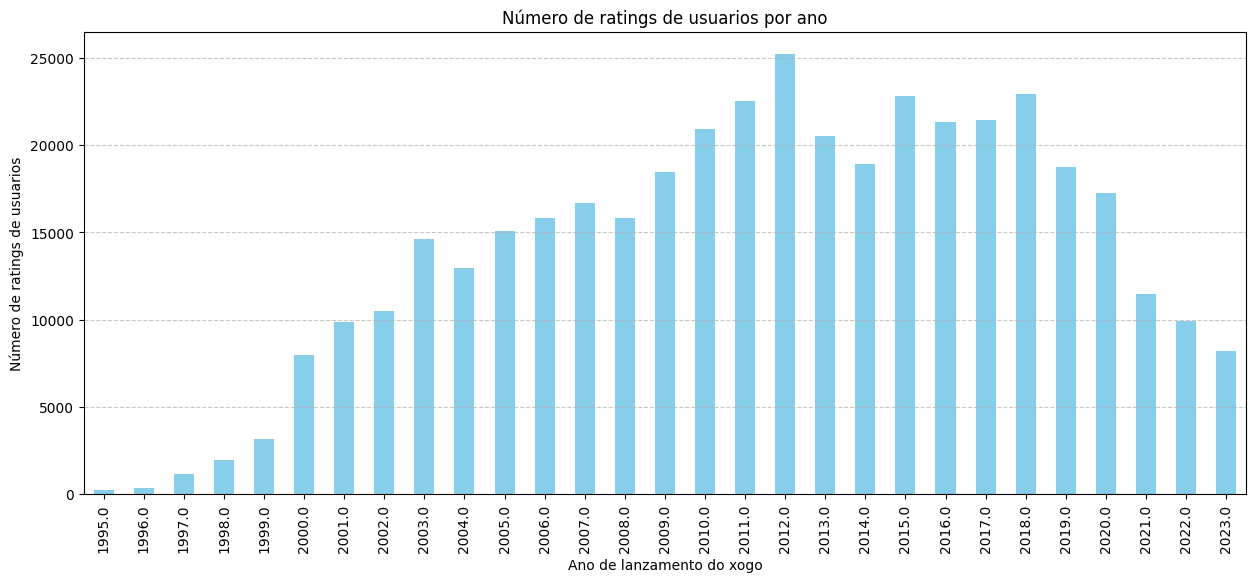

In [22]:
ratings_per_year = games_clean2.groupby('ReleaseYear')['User Ratings Count'].sum()

plt.figure(figsize=(15, 6))
ratings_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de ratings de usuarios por ano')
plt.xlabel('Ano de lanzamento do xogo')
plt.ylabel('Número de ratings de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Vemos que nos últimos anos parece que decrece o numero de ratings, cousa que contrasta coa gráfica antes de eliminar outliers. Debe ser que cada ano 'hai máis outliers', podería deberse a un aumento de usuarios facendo ratings de videoxogos, facendo que haxa máis xogos con moitos ratings que serían outliers ao haber datos de anos anteriores onde non era tan común que os xogos tivesen moitos ratings.

Representamos a distribución de Product Rating

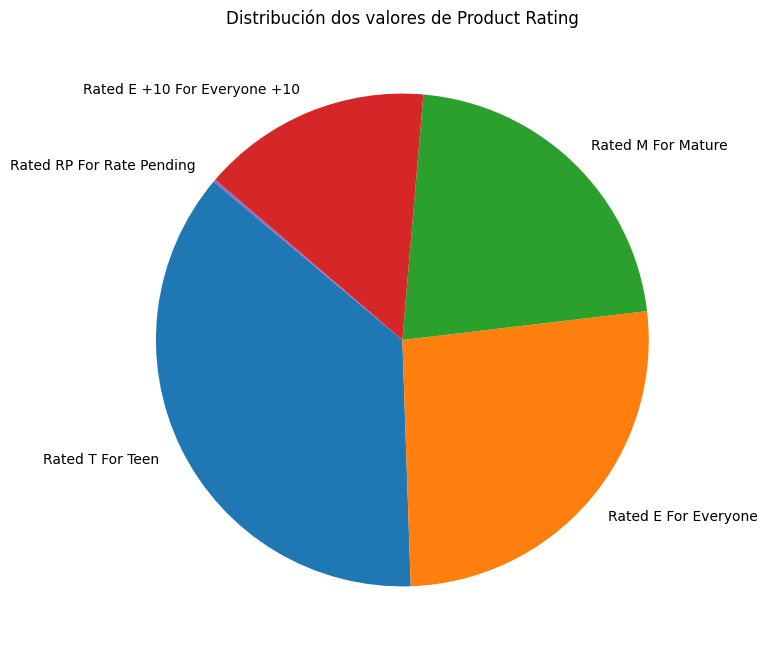

In [23]:
product_rating_ocurr = games_clean['Product Rating'].value_counts()

plt.figure(figsize=(8, 8))
product_rating_ocurr.plot(kind='pie', startangle=140)
plt.title('Distribución dos valores de Product Rating')
plt.ylabel('')
plt.show()

In [24]:
games_clean['Product Rating'].value_counts()

Product Rating
Rated T For Teen                3326
Rated E For Everyone            2389
Rated M For Mature              1975
Rated E +10 For Everyone +10    1369
Rated RP For Rate Pending         15
Name: count, dtype: int64

Eses 15 xogos pendientes de rating poderían deberse ao xogos que acaban de saír? Tendo en conta que xa eliminamos os xogos de 2024, non ten moita pinta.

In [25]:
games_clean[games_clean['Product Rating'] == 'Rated RP For Rate Pending']

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info,ReleaseYear
600,BioShock Infinite: Clash in the Clouds,2013-07-30,Irrational Games,2K Games,FPS,Rated RP For Rate Pending,7.0,66.0,"[{'Platform': 'Xbox 360', 'Platform Metascore'...",2013.0
661,Back to the Future: The Game - Episode II: Get...,2011-02-17,Telltale Games,Telltale Games,Third-Person Adventure,Rated RP For Rate Pending,7.2,47.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",2011.0
954,So Many Me,2014-07-17,Extend Interactive,Extend Interactive,Action Puzzle,Rated RP For Rate Pending,7.1,22.0,"[{'Platform': 'PC', 'Platform Metascore': '78'...",2014.0
3381,Last Year: The Nightmare,2018-12-18,Elastic Games,Elastic Games,Survival,Rated RP For Rate Pending,5.3,39.0,"[{'Platform': 'PC', 'Platform Metascore': '73'...",2018.0
5858,E.Y.E: Divine Cybermancy,2011-07-29,Streum On Studio,Streum On Studio,Western RPG,Rated RP For Rate Pending,6.9,188.0,"[{'Platform': 'PC', 'Platform Metascore': '61'...",2011.0
6012,Naval War: Arctic Circle,2012-04-10,Turbo Tape Games,Paradox Interactive,Real-Time Strategy,Rated RP For Rate Pending,5.8,23.0,"[{'Platform': 'PC', 'Platform Metascore': '64'...",2012.0
6431,Back to the Future: The Game - Episode V: OUTA...,2011-06-23,Telltale Games,Telltale Games,Third-Person Adventure,Rated RP For Rate Pending,7.1,44.0,"[{'Platform': 'PC', 'Platform Metascore': '75'...",2011.0
7076,Blueprint 3D,2011-11-10,FDG Entertainment,FDG Entertainment,Puzzle,Rated RP For Rate Pending,6.8,11.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",2011.0
7274,Back to the Future: The Game - Episode IV: Dou...,2011-04-29,Telltale Games,Telltale Games,Third-Person Adventure,Rated RP For Rate Pending,6.1,35.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",2011.0
8310,The Legend of Heroes: Trails in the Sky SC,2015-10-29,Falcom,XSEED Games,JRPG,Rated RP For Rate Pending,8.7,151.0,"[{'Platform': 'PSP', 'Platform Metascore': '76...",2015.0


Realmente son xogos que non teñen moito que ver entre eles.

Como son moi poucos imolos eliminar para representar o resto máis claramente.

In [26]:
elim_rows = games_clean2[games_clean2['Product Rating'] == 'Rated RP For Rate Pending']

games_clean2 = games_clean2.drop(elim_rows.index)

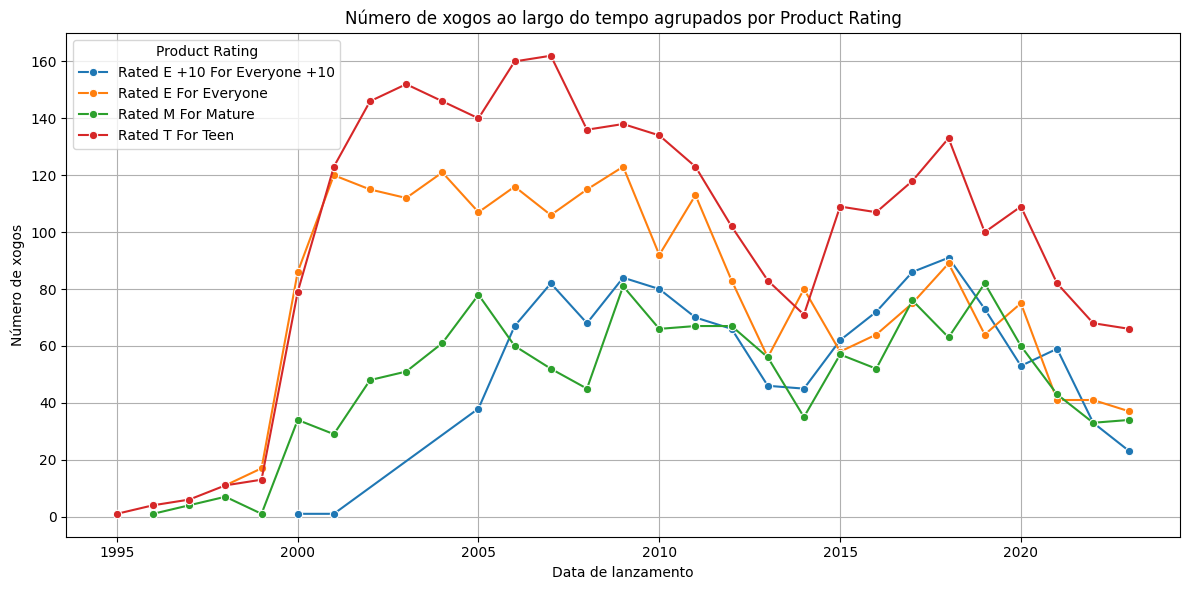

In [27]:
games_per_rating_date = games_clean2.groupby(['ReleaseYear', 'Product Rating']).size().unstack()

plt.figure(figsize=(12, 6))
for rating in games_per_rating_date.columns:
    sns.lineplot(data=games_per_rating_date, x=games_per_rating_date.index, y=games_per_rating_date[rating], marker='o', label=rating)

plt.title('Número de xogos ao largo do tempo agrupados por Product Rating')
plt.xlabel('Data de lanzamento')
plt.ylabel('Número de xogos')
plt.legend(title='Product Rating', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


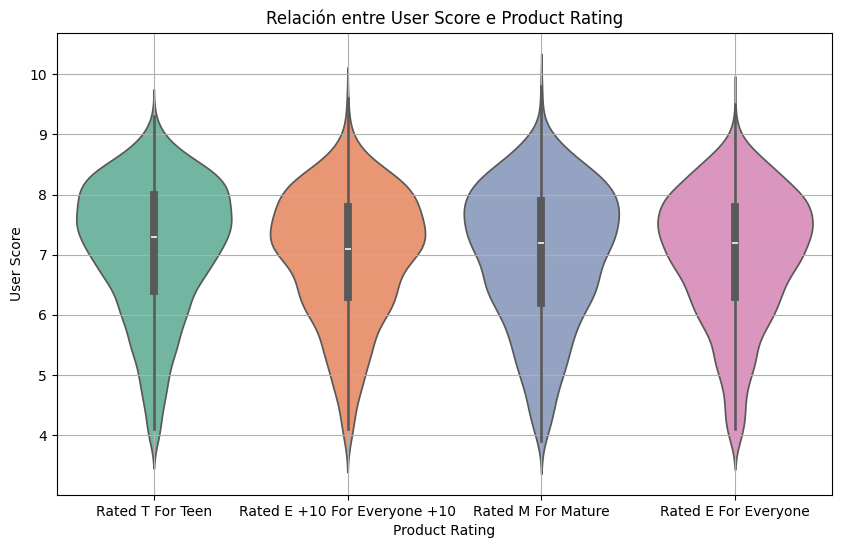

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=games_clean2, x='Product Rating', y='User Score', palette='Set2', hue='Product Rating', legend=False)

plt.title('Relación entre User Score e Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

Non hai apenas diferenza entre o User Score en base ao Product Rating

Imos visualizar agora os distintos xéneros de xogos.

In [29]:
games_clean2['Genres'].value_counts()

Genres
Action Adventure    452
2D Platformer       413
Action RPG          404
FPS                 296
JRPG                263
                   ... 
Cricket               2
Surfing               1
Racing Sim            1
Marine Sim            1
Bowling               1
Name: count, Length: 117, dtype: int64

Hai moitos tipos distintos polo que imos empregar os que teñen máis xogos rexistrados.

In [30]:
games_clean2['Genres'].value_counts().head(20)

Genres
Action Adventure        452
2D Platformer           413
Action RPG              404
FPS                     296
JRPG                    263
Real-Time Strategy      224
Auto Racing             201
Auto Racing Sim         195
Compilation             185
3D Platformer           178
Third Person Shooter    165
Survival                165
Open-World Action       157
3D Beat-'Em-Up          151
Adventure               145
Turn-Based Tactics      142
3D Fighting             142
Action                  131
Rhythm                  121
Action Puzzle           116
Name: count, dtype: int64

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

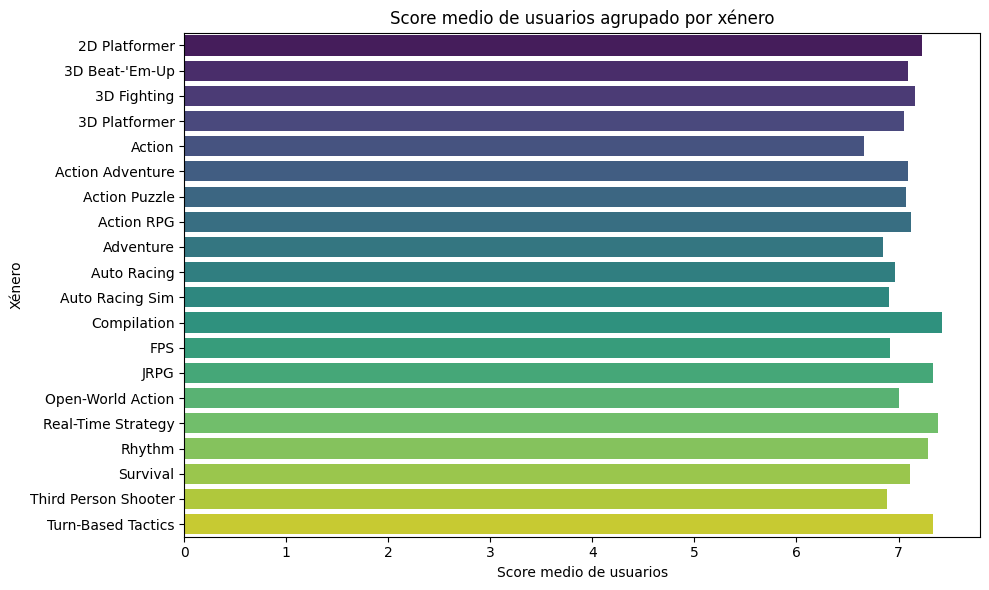

In [31]:

top_20_genres = games_clean2['Genres'].value_counts().head(20).index
top_games_genre = games_clean2[games_clean2['Genres'].isin(top_20_genres)]

genre_user_score = top_games_genre.groupby('Genres')['User Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
# plt.grid(True)
sns.barplot(data=genre_user_score, x='User Score', y='Genres', palette='viridis', hue='Genres')

plt.title('Score medio de usuarios agrupado por xénero')
plt.xlabel('Score medio de usuarios')
plt.ylabel('Xénero')

plt.tight_layout()
plt.show()

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

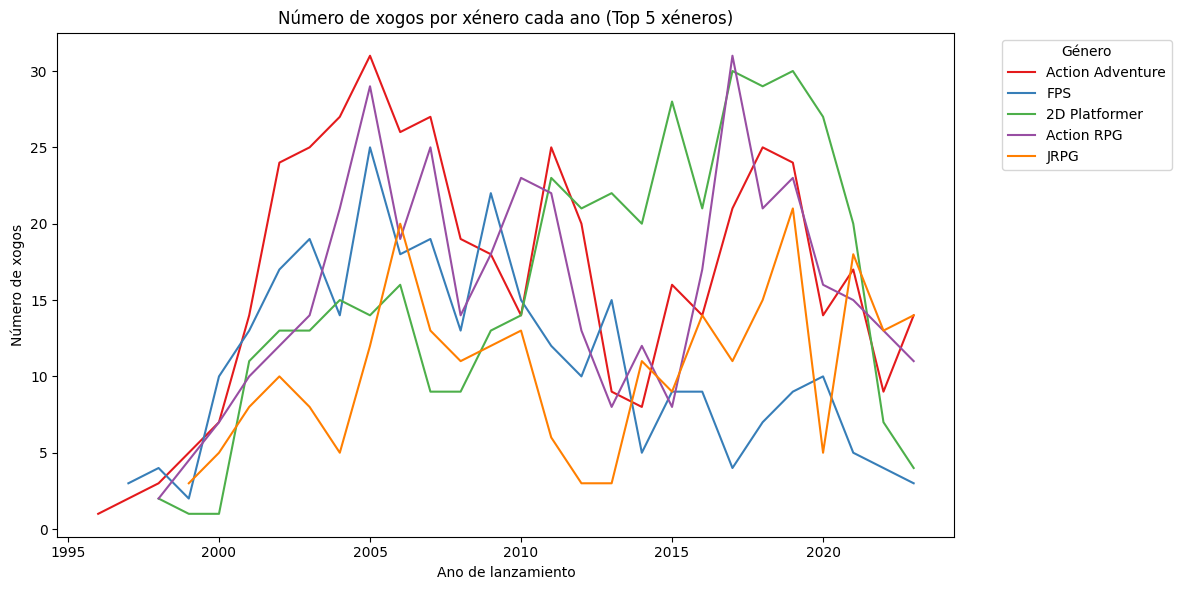

In [32]:
top_5_genre = games_clean2['Genres'].value_counts().head(5).index

filtered_games = games_clean2[games_clean2['Genres'].isin(top_5_genre)]

games_per_year_genre = filtered_games.groupby(['ReleaseYear', 'Genres']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=games_per_year_genre, x='ReleaseYear', y='Count', hue='Genres', palette='Set1')

plt.title('Número de xogos por xénero cada ano (Top 5 xéneros)')
plt.xlabel('Ano de lanzamiento')
plt.ylabel('Número de xogos')
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.25, 1))
# plt.grid(True)
plt.tight_layout()
plt.show()

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

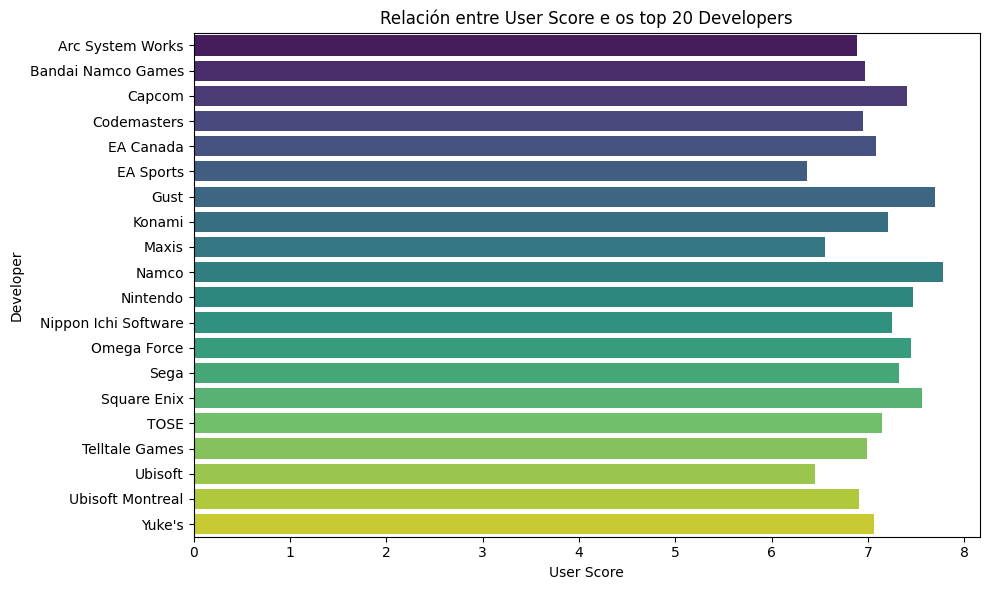

In [33]:
top_20_devs = games_clean2['Developer'].value_counts().head(20).index

# Filtrar el DataFrame original para incluir solo los juegos desarrollados por los 20 principales desarrolladores
filtered_games = games_clean2[games_clean2['Developer'].isin(top_20_devs)]
dev_score_rating = filtered_games.groupby('Developer')['User Score'].mean().reset_index()

# Crear el gráfico de violín con Seaborn
plt.figure(figsize=(10, 6))
# plt.grid(True)
sns.barplot(data=dev_score_rating, x='User Score', y='Developer',palette='viridis', hue='Developer')

plt.title('Relación entre User Score e os top 20 Developers')
plt.ylabel('Developer')
plt.xlabel('User Score')

plt.tight_layout()
plt.show()

/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/neirapablo/miniconda3/envs/neira_env/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

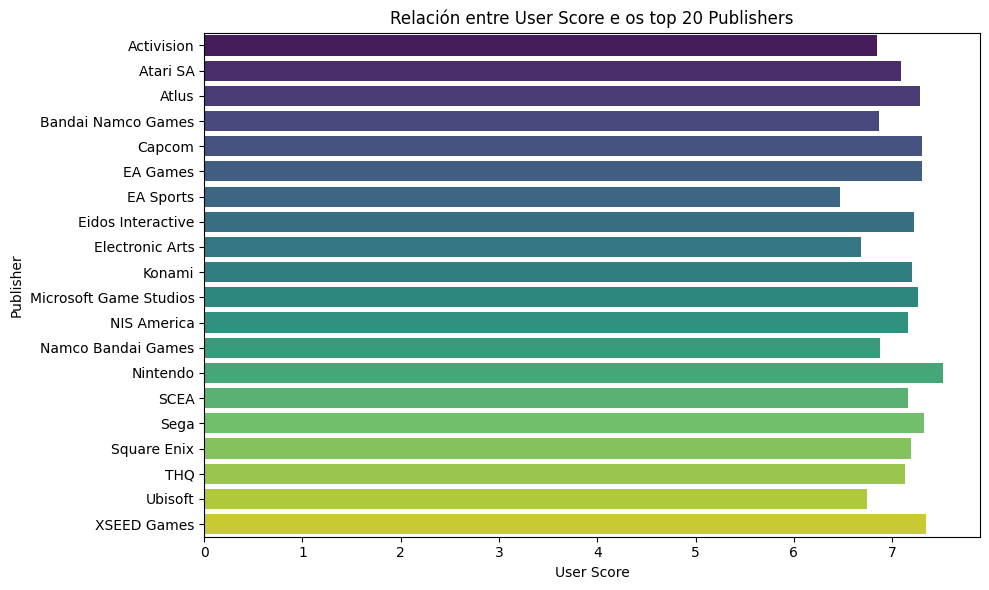

In [34]:
top_20_publi = games_clean2['Publisher'].value_counts().head(20).index

# Filtrar el DataFrame original para incluir solo los juegos desarrollados por los 20 principales desarrolladores
filtered_games = games_clean2[games_clean2['Publisher'].isin(top_20_publi)]
publi_score_rating = filtered_games.groupby('Publisher')['User Score'].mean().reset_index()

# Crear el gráfico de violín con Seaborn
plt.figure(figsize=(10, 6))
# plt.grid(True)
sns.barplot(data=publi_score_rating, x='User Score', y='Publisher',palette='viridis', hue='Publisher')

plt.title('Relación entre User Score e os top 20 Publishers')
plt.ylabel('Publisher')
plt.xlabel('User Score')

plt.tight_layout()
plt.show()

Imos empregar agora o MetaScore da columna PlatformsInfo para ver se hai diferenzas entre o score que dan os usuarios e a prensa.

[Enlace ao notebook de onde saen as seguintes operacións](https://www.kaggle.com/code/sandroebert/eda-video-games-metascore/notebook)

In [35]:
metascore_df = games_clean2.copy()

In [36]:
metascore_df = (
        metascore_df.
        rename(columns = {'Release Date': 'ReleaseDate', 'Product Rating': 'ProductRating',
                          'User Score': 'UserScore', 'User Ratings Count': 'UserRatingsCount',
                            'Platforms Info': 'PlatformsInfo'}).
        drop(columns=['ReleaseDate'])

    ).query('ReleaseYear < 2024')

In [37]:
metascore_df.sample(5)

,Title,Developer,Publisher,Genres,ProductRating,UserScore,UserRatingsCount,PlatformsInfo,ReleaseYear
7904,Marvel vs. Capcom 2,Backbone Entertainment,Capcom,2D Fighting,Rated T For Teen,8.5,31.0,"[{'Platform': 'PlayStation 2', 'Platform Metas...",2009.0
10316,Dragoneer's Aria,Hit Maker,NIS America,JRPG,Rated E +10 For Everyone +10,6.4,5.0,"[{'Platform': 'PSP', 'Platform Metascore': '56...",2007.0
9658,Atelier Iris 2: The Azoth of Destiny,Gust,NIS America,JRPG,Rated E +10 For Everyone +10,7.2,19.0,"[{'Platform': 'PlayStation 2', 'Platform Metas...",2006.0
7195,King's Quest Chapter 2: Rubble Without a Cause,The Odd Gentlemen,Sierra Games,Adventure,Rated E +10 For Everyone +10,5.7,28.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2015.0
10464,The Book of Unwritten Tales,KING Art,The Adventure Company,Adventure,Rated T For Teen,8.3,164.0,"[{'Platform': 'PC', 'Platform Metascore': '82'...",2011.0


In [38]:
pd.set_option('display.max_colwidth', None)

data = {}
for index, row in metascore_df.iterrows():
    platforms_in_entry = eval(row['PlatformsInfo'])
    metascores = []
    for platform_info in platforms_in_entry:
        metascore = platform_info['Platform Metascore']
        if metascore != 'tbd':
            metascores.append(int(metascore))
    if metascores:
        data[index] = sum(metascores) / len(metascores)
    else:
        data[index] = None

# create a new df with the average MetaScores
metascores = pd.DataFrame({'AverageMetascore': data})

In [39]:
games_metascores = pd.concat([metascore_df,metascores], axis = 1)
games_metascores.UserScore = games_metascores.UserScore*10
games_metascores['DevUserscoreMetascore'] = (games_metascores.UserScore - games_metascores.AverageMetascore)

In [40]:
games_metascores.sample(5)

,Title,Developer,Publisher,Genres,ProductRating,UserScore,UserRatingsCount,PlatformsInfo,ReleaseYear,AverageMetascore,DevUserscoreMetascore
9945,Dawn of Discovery: Venice,Related Designs,Ubisoft,Simulation,Rated T For Teen,81.0,30.0,"[{'Platform': 'PC', 'Platform Metascore': '78', 'Platform Metascore Count': 'Based on 16 Critic Reviews'}]",2010.0,78.000000,3.000000
8845,Spartan (2004),Slitherine,Graphsim Entertainment,Turn-Based Strategy,Rated T For Teen,74.0,19.0,"[{'Platform': 'PC', 'Platform Metascore': '56', 'Platform Metascore Count': 'Based on 13 Critic Reviews'}]",2004.0,56.000000,18.000000
3034,Doki-Doki Universe,Humanature Studios,SCEA,Miscellaneous,Rated E +10 For Everyone +10,63.0,103.0,"[{'Platform': 'PlayStation 4', 'Platform Metascore': '71', 'Platform Metascore Count': 'Based on 28 Critic Reviews'}, {'Platform': 'PlayStation Vita', 'Platform Metascore': '66', 'Platform Metascore Count': 'Based on 7 Critic Reviews'}, {'Platform': 'PlayStation 3', 'Platform Metascore': '62', 'Platform Metascore Count': 'Based on 10 Critic Reviews'}]",2013.0,66.333333,-3.333333
2777,Tembo the Badass Elephant,Game Freak,Sega,Action Adventure,Rated E +10 For Everyone +10,66.0,57.0,"[{'Platform': 'Xbox One', 'Platform Metascore': '70', 'Platform Metascore Count': 'Based on 13 Critic Reviews'}, {'Platform': 'PlayStation 4', 'Platform Metascore': '72', 'Platform Metascore Count': 'Based on 32 Critic Reviews'}, {'Platform': 'PC', 'Platform Metascore': '69', 'Platform Metascore Count': 'Based on 18 Critic Reviews'}]",2015.0,70.333333,-4.333333
5972,Yaris,Backbone Entertainment,Backbone Entertainment,Auto Racing,Rated E +10 For Everyone +10,49.0,47.0,"[{'Platform': 'Xbox 360', 'Platform Metascore': '17', 'Platform Metascore Count': 'Based on 7 Critic Reviews'}]",2007.0,17.000000,32.000000


In [41]:
games_metascores.describe()

,UserScore,UserRatingsCount,ReleaseYear,AverageMetascore,DevUserscoreMetascore
count,7482.000000,7482.000000,7482.000000,7481.000000,7481.000000
mean,70.321171,54.264902,2010.808875,70.395947,-0.077006
std,11.035901,62.337908,6.517994,10.953486,11.376483
min,39.000000,5.000000,1995.000000,17.000000,-44.000000
25%,63.000000,12.000000,2006.000000,64.000000,-7.000000
50%,72.000000,28.000000,2010.000000,72.000000,0.000000
75%,79.000000,71.000000,2017.000000,78.250000,6.666667
max,98.000000,294.000000,2023.000000,97.000000,51.000000


No análise estadístico vemos que a media é moi parecida, polo que non debe haber moita diferenza na maioría dos casos.

In [42]:
games_metascores.sort_values(by='DevUserscoreMetascore', ascending=False).head(10)

,Title,Developer,Publisher,Genres,ProductRating,UserScore,UserRatingsCount,PlatformsInfo,ReleaseYear,AverageMetascore,DevUserscoreMetascore
4033,Looney Tunes: Acme Arsenal,Red Tribe,Warner Bros. Interactive Entertainment,3D Platformer,Rated E +10 For Everyone +10,86.0,5.0,"[{'Platform': 'Xbox 360', 'Platform Metascore': '40', 'Platform Metascore Count': 'Based on 15 Critic Reviews'}, {'Platform': 'PlayStation 2', 'Platform Metascore': '38', 'Platform Metascore Count': 'Based on 10 Critic Reviews'}, {'Platform': 'Wii', 'Platform Metascore': '27', 'Platform Metascore Count': 'Based on 7 Critic Reviews'}]",2007.0,35.0,51.0
4675,SPOGS Racing,Pronto Games,D2C Games,Auto Racing,Rated E For Everyone,64.0,8.0,"[{'Platform': 'Wii', 'Platform Metascore': '18', 'Platform Metascore Count': 'Based on 7 Critic Reviews'}]",2008.0,18.0,46.0
998,Land of the Dead: Road to Fiddler's Green,Brainbox Games,Groove Games,FPS,Rated M For Mature,80.0,5.0,"[{'Platform': 'PC', 'Platform Metascore': '36', 'Platform Metascore Count': 'Based on 4 Critic Reviews'}, {'Platform': 'Xbox', 'Platform Metascore': '32', 'Platform Metascore Count': 'Based on 9 Critic Reviews'}]",2005.0,34.0,46.0
1438,Predator: Concrete Jungle,Eurocom,VU Games,Action Adventure,Rated M For Mature,91.0,23.0,"[{'Platform': 'PlayStation 2', 'Platform Metascore': '47', 'Platform Metascore Count': 'Based on 14 Critic Reviews'}, {'Platform': 'Xbox', 'Platform Metascore': '46', 'Platform Metascore Count': 'Based on 17 Critic Reviews'}]",2005.0,46.5,44.5
12708,Zoids Assault,Takara Tomy,Atlus,Turn-Based Strategy,Rated T For Teen,89.0,8.0,"[{'Platform': 'Xbox 360', 'Platform Metascore': '46', 'Platform Metascore Count': 'Based on 17 Critic Reviews'}]",2008.0,46.0,43.0
13955,Jekyll & Hyde (2001),In Utero,DreamCatcher Interactive,Action,Rated T For Teen,75.0,6.0,"[{'Platform': 'PC', 'Platform Metascore': '34', 'Platform Metascore Count': 'Based on 10 Critic Reviews'}]",2001.0,34.0,41.0
9035,Target: Terror,Leviathan Games,Konami,Light Gun,Rated M For Mature,74.0,5.0,"[{'Platform': 'Wii', 'Platform Metascore': '33', 'Platform Metascore Count': 'Based on 19 Critic Reviews'}]",2008.0,33.0,41.0
6935,Cops 2170: The Power of Law,Mist Land,Strategy First,Real-Time Strategy,Rated T For Teen,85.0,15.0,"[{'Platform': 'PC', 'Platform Metascore': '44', 'Platform Metascore Count': 'Based on 16 Critic Reviews'}]",2005.0,44.0,41.0
177,NightCry,"NUDE MAKER,Y.K.",Active Gaming Media,Action Adventure,Rated M For Mature,84.0,5.0,"[{'Platform': 'PC', 'Platform Metascore': '44', 'Platform Metascore Count': 'Based on 8 Critic Reviews'}, {'Platform': 'PlayStation Vita', 'Platform Metascore': 'tbd', 'Platform Metascore Count': 'Based on 3 Critic Reviews'}]",2016.0,44.0,40.0
7043,Spectral Souls: Resurrection of the Ethereal Empires,Idea Factory,NIS America,Turn-Based Strategy,Rated T For Teen,87.0,15.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform Metascore': 'tbd', 'Platform Metascore Count': 'Based on 2 Critic Reviews'}, {'Platform': 'PSP', 'Platform Metascore': '47', 'Platform Metascore Count': 'Based on 27 Critic Reviews'}]",2006.0,47.0,40.0


## Observacións:

  -  O número de lanzamentos de videoxogos foi en aumento na 1ª década dos 2000 e na segunda descende levemente.

  - No 2020 'The Last of Us Part II' recibiu un enorme número de ratings

  - A partir de ese mesmo ano podemos deducir que aumentou o número de usuarios de Metacritic xa comezamos a atopar máis outliers.

  - Non podemos decir que o Product Rating nin o Genre afecte ao Score Rating dos usuarios

  - Non existe tampouco unha gran diferenza de Ratings entre os usuarios e a prensa.